In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

File Path Constant

In [97]:
file_path = {
    "raw_merged_data": "../Data/raw_merged_data.csv",
    "country_code": "../Data/IndependentStates_Dependencies.csv",
    "energy": "../Data/energy-use-per-person.csv"
}

Read Data as DataFrame

In [98]:
df = pd.read_csv(file_path["raw_merged_data"])
df_country = pd.read_csv(file_path["country_code"], encoding="latin1")
df_energy = pd.read_csv(file_path["energy"])

Pre-Process

In [99]:
# Đổi tên các cột trong df["energy"]
df_energy.rename(columns={"Primary energy consumption per capita (kWh/person)": "ft_energy_capita","Entity":"country","Year":"year"}, inplace=True)

In [100]:
# Merged data energy
df_merge_energy = pd.merge(
    df,
    df_energy,
    left_on=["country", "year"],
    right_on=["country", "year"],
    how="left"
)

In [101]:
# Lấy country_code để merge
df_country_code = df_country.loc[df_country['STATUS']=='Independent',['GENC_3A_CODE']]
df_country_code

,GENC_3A_CODE
0,AFG
1,ALB
2,DZA
3,AND
4,AGO
...,...
192,VEN
193,VNM
194,YEM
195,ZMB


In [102]:
# Loại bỏ data của các vùng lãnh thổ
df_merge = pd.merge(df_country_code,df_merge_energy, how="left", left_on='GENC_3A_CODE', right_on='iso_code')
df_merge

,GENC_3A_CODE,Unnamed: 0,country,iso_code,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_tax,...,ft_globalclimatephysicalriskindexgcpri,ft_cri,ft_fossil_fuel,ft_government_expenditure_on_education,ft_environmental_protection,ft_area_ha,ft_deforestation,ft_gdp,ft_renewable_energy,ft_energy_capita
0,AFG,26.0,Afghanistan,AFG,2000.0,1.047,0.351,NaN,NaN,NaN,...,18.216162,NaN,NaN,NaN,NaN,65286400.0,NaN,3.521418e+09,45.0,262.68048
1,AFG,27.0,Afghanistan,AFG,2001.0,1.069,0.355,NaN,88.092712,NaN,...,20.008285,NaN,NaN,NaN,NaN,65286400.0,103.0,2.813572e+09,45.6,179.89190
2,AFG,28.0,Afghanistan,AFG,2002.0,1.341,0.383,23.810127,178.947855,NaN,...,17.595130,NaN,NaN,NaN,NaN,65286400.0,214.0,3.825701e+09,37.8,155.69543
3,AFG,29.0,Afghanistan,AFG,2003.0,1.560,0.392,22.710864,244.336255,NaN,...,16.271540,NaN,NaN,NaN,NaN,65286400.0,267.0,4.520947e+09,36.7,174.55792
4,AFG,30.0,Afghanistan,AFG,2004.0,1.237,0.408,26.226790,201.322404,NaN,...,18.795908,NaN,NaN,NaN,NaN,65286400.0,226.0,5.224897e+09,44.2,157.75752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,ZWE,6469.0,Zimbabwe,ZWE,2021.0,10.204,0.581,28.805586,9012.071679,NaN,...,7.120811,NaN,43.40,NaN,NaN,39075700.0,32787.0,2.724051e+10,82.4,2382.43430
5093,ZWE,6470.0,Zimbabwe,ZWE,2022.0,10.425,0.594,39.691641,8226.760713,NaN,...,7.449997,NaN,45.28,NaN,NaN,39075700.0,22692.0,3.278966e+10,NaN,3633.06740
5094,ZWE,6471.0,Zimbabwe,ZWE,2023.0,11.164,0.598,26.301060,5668.385497,NaN,...,6.005716,NaN,NaN,NaN,NaN,39075700.0,18637.0,3.523137e+10,NaN,3181.36100
5095,ZWE,6472.0,Zimbabwe,ZWE,2024.0,NaN,NaN,NaN,5834.540735,NaN,...,NaN,NaN,NaN,NaN,NaN,39075700.0,19466.0,4.418770e+10,NaN,NaN


In [103]:
# Kiểm tra các column của df_merge
df_merge.columns

Index(['GENC_3A_CODE', 'Unnamed: 0', 'country', 'iso_code', 'year', 'ft_co2',
       'ft_hdi', 'ft_industr_on_gdp', 'ft_deforest_area_ha', 'ft_tax',
       'ft_forest_area_percent', 'ft_forest_area_sqkm', 'ft_population',
       'ft_electriccarssold', 'ft_nonelectriccarsales',
       'ft_globalclimatephysicalriskindexgcpri', 'ft_cri', 'ft_fossil_fuel',
       'ft_government_expenditure_on_education', 'ft_environmental_protection',
       'ft_area_ha', 'ft_deforestation', 'ft_gdp', 'ft_renewable_energy',
       'ft_energy_capita'],
      dtype='object')

In [104]:
# Xoá bỏ các column không cần thiết
df_merge.drop(columns=['GENC_3A_CODE','Unnamed: 0'],inplace=True)

In [105]:
print("Shape of df_merge_energy: ",df_merge_energy.shape)
print("Shape of df_merge: ",df_merge.shape)

Shape of df_merge_energy:  (6474, 24)
Shape of df_merge:  (5097, 23)


In [106]:
#Thống kê kiểu dữ liệu, số lượng giá trị non-null
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 5096 non-null   object 
 1   iso_code                                5096 non-null   object 
 2   year                                    5096 non-null   float64
 3   ft_co2                                  4632 non-null   float64
 4   ft_hdi                                  4440 non-null   float64
 5   ft_industr_on_gdp                       4358 non-null   float64
 6   ft_deforest_area_ha                     4080 non-null   float64
 7   ft_tax                                  396 non-null    float64
 8   ft_forest_area_percent                  4403 non-null   float64
 9   ft_forest_area_sqkm                     4403 non-null   float64
 10  ft_population                           4632 non-null   floa

In [107]:
# Thống kê tỉ lệ % missing dữ liệu CO2 theo từng năm
missing_co2_by_year = (
    df_merge
    .groupby('year')['ft_co2']
    .apply(lambda x: x.isna().mean() * 100)
    .reset_index(name='missing_pct')
)

# Ép year về int nếu cần
missing_co2_by_year['year'] = missing_co2_by_year['year'].astype(int)

print(missing_co2_by_year)


    year  missing_pct
0   2000     1.530612
1   2001     1.530612
2   2002     1.530612
3   2003     1.530612
4   2004     1.530612
5   2005     1.530612
6   2006     1.530612
7   2007     1.530612
8   2008     1.530612
9   2009     1.530612
10  2010     1.530612
11  2011     1.530612
12  2012     1.530612
13  2013     1.530612
14  2014     1.530612
15  2015     1.530612
16  2016     1.530612
17  2017     1.530612
18  2018     1.530612
19  2019     1.530612
20  2020     1.530612
21  2021     1.530612
22  2022     1.530612
23  2023     1.530612
24  2024   100.000000
25  2025   100.000000


In [108]:
# Xoá những record bị missing data CO2
df_merge = df_merge.dropna(subset=['ft_co2'])

In [109]:
df_merge.shape

(4632, 23)

In [110]:
# Chuyển đơn vị diện tích rừng sang ha
df_merge['ft_forest_area_ha'] = df_merge['ft_forest_area_sqkm']*100

/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_10715/2083046445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['ft_forest_area_ha'] = df_merge['ft_forest_area_sqkm']*100


In [111]:
#Tính tỉ lệ missing các thuộc tính
(df_merge.isnull().sum()/df_merge.shape[0]*100).sort_values(ascending=False)

ft_tax                                    92.724525
ft_nonelectriccarsales                    92.357513
ft_electriccarssold                       92.357513
ft_cri                                    90.414508
ft_environmental_protection               86.765976
ft_fossil_fuel                            70.811744
ft_government_expenditure_on_education    35.902418
ft_deforestation                          23.531952
ft_deforest_area_ha                       15.954231
ft_globalclimatephysicalriskindexgcpri    14.594128
ft_energy_capita                          11.917098
ft_renewable_energy                        8.549223
ft_industr_on_gdp                          6.390328
ft_forest_area_ha                          5.936960
ft_forest_area_sqkm                        5.936960
ft_forest_area_percent                     5.936960
ft_hdi                                     4.663212
ft_gdp                                     2.547496
ft_population                              1.036269
iso_code    

In [112]:
#Drop các column có tỉ lệ missing value trên 70%
df_merge.drop(columns=['ft_forest_area_sqkm','ft_tax','ft_fossil_fuel','ft_environmental_protection','ft_cri','ft_nonelectriccarsales','ft_electriccarssold','ft_deforestation'],inplace=True)

/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_10715/3074204035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.drop(columns=['ft_forest_area_sqkm','ft_tax','ft_fossil_fuel','ft_environmental_protection','ft_cri','ft_nonelectriccarsales','ft_electriccarssold','ft_deforestation'],inplace=True)


In [113]:
feature_cols = df_merge.select_dtypes(include=['float64', 'int64']).columns
feature_cols = [col for col in feature_cols if col not in ['year']]
print("Danh sách các cột feature: ")
feature_cols

Danh sách các cột feature: 


['ft_co2',
 'ft_hdi',
 'ft_industr_on_gdp',
 'ft_deforest_area_ha',
 'ft_forest_area_percent',
 'ft_population',
 'ft_globalclimatephysicalriskindexgcpri',
 'ft_government_expenditure_on_education',
 'ft_area_ha',
 'ft_gdp',
 'ft_renewable_energy',
 'ft_energy_capita',
 'ft_forest_area_ha']

In [114]:
# Tính tỉ lệ missing theo năm của từng feature_cols
missing_ratio_by_year = (
    df_merge.groupby('year')[feature_cols]
    .apply(lambda x: x.isnull().mean() * 100)
    .round(2)
    .reset_index()
)
missing_ratio_by_year['year'] = missing_ratio_by_year['year'].astype(int)
missing_ratio_by_year = missing_ratio_by_year[
    missing_ratio_by_year[feature_cols].gt(50).any(axis=1)
]
missing_ratio_by_year

,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_government_expenditure_on_education,ft_area_ha,ft_gdp,ft_renewable_energy,ft_energy_capita,ft_forest_area_ha
0,2000,0.0,12.44,11.40,100.00,3.11,1.04,16.58,45.08,0.0,2.07,2.59,12.95,3.11
7,2007,0.0,4.66,6.74,11.40,2.07,1.04,14.51,50.78,0.0,2.07,1.55,11.92,2.07
22,2022,0.0,2.07,5.70,14.51,1.04,1.04,13.99,41.97,0.0,4.15,72.54,11.40,1.04
23,2023,0.0,1.55,8.81,12.44,100.00,1.04,13.47,65.28,0.0,4.66,100.00,11.40,100.00


In [115]:
# Giới hạn dữ liệu, loại bỏ dữ liệu năm 2000 và 2023 vì có các cột bị missing 100%
df_new = df_merge[~df_merge['year'].isin([2000, 2023])]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4246 entries, 1 to 5093
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 4246 non-null   object 
 1   iso_code                                4246 non-null   object 
 2   year                                    4246 non-null   float64
 3   ft_co2                                  4246 non-null   float64
 4   ft_hdi                                  4057 non-null   float64
 5   ft_industr_on_gdp                       3989 non-null   float64
 6   ft_deforest_area_ha                     3724 non-null   float64
 7   ft_forest_area_percent                  4170 non-null   float64
 8   ft_population                           4202 non-null   float64
 9   ft_globalclimatephysicalriskindexgcpri  3628 non-null   float64
 10  ft_government_expenditure_on_education  2796 non-null   float64
 

In [116]:
df_new

,country,iso_code,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_government_expenditure_on_education,ft_area_ha,ft_gdp,ft_renewable_energy,ft_energy_capita,ft_forest_area_ha
1,Afghanistan,AFG,2001.0,1.069,0.355,NaN,88.092712,1.852782,20284307.0,20.008285,NaN,65286400.0,2.813572e+09,45.6,179.89190,1208440.0
2,Afghanistan,AFG,2002.0,1.341,0.383,23.810127,178.947855,1.852782,21378117.0,17.595130,NaN,65286400.0,3.825701e+09,37.8,155.69543,1208440.0
3,Afghanistan,AFG,2003.0,1.560,0.392,22.710864,244.336255,1.852782,22733049.0,16.271540,NaN,65286400.0,4.520947e+09,36.7,174.55792,1208440.0
4,Afghanistan,AFG,2004.0,1.237,0.408,26.226790,201.322404,1.852782,23560654.0,18.795908,NaN,65286400.0,5.224897e+09,44.2,157.75752,1208440.0
5,Afghanistan,AFG,2005.0,1.890,0.417,26.812099,236.021558,1.852782,24404567.0,12.682471,NaN,65286400.0,6.203257e+09,33.9,205.46812,1208440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,Zimbabwe,ZWE,2018.0,11.205,0.586,31.037911,6541.812114,45.332093,15034452.0,3.969643,19.158785,39075700.0,3.415606e+10,79.7,2897.93870,17536720.0
5090,Zimbabwe,ZWE,2019.0,10.263,0.584,32.025943,11514.478630,45.213002,15271368.0,5.673413,10.463589,39075700.0,2.571566e+10,81.0,2603.88100,17490650.0
5091,Zimbabwe,ZWE,2020.0,8.495,0.582,32.767518,6200.712494,45.093912,15526888.0,2.340203,15.666611,39075700.0,2.686856e+10,84.1,2163.06840,17444580.0
5092,Zimbabwe,ZWE,2021.0,10.204,0.581,28.805586,9012.071679,44.974822,15797210.0,7.120811,NaN,39075700.0,2.724051e+10,82.4,2382.43430,17398510.0


In [117]:
#Tính tỉ lệ missing các cột
(df_new.isnull().sum()/df_new.shape[0]*100).sort_values(ascending=False)

ft_government_expenditure_on_education    34.149788
ft_globalclimatephysicalriskindexgcpri    14.554875
ft_deforest_area_ha                       12.293924
ft_energy_capita                          11.893547
ft_industr_on_gdp                          6.052756
ft_renewable_energy                        4.663212
ft_hdi                                     4.451248
ft_gdp                                     2.472916
ft_forest_area_percent                     1.789920
ft_forest_area_ha                          1.789920
ft_population                              1.036269
country                                    0.000000
iso_code                                   0.000000
year                                       0.000000
ft_co2                                     0.000000
ft_area_ha                                 0.000000
dtype: float64

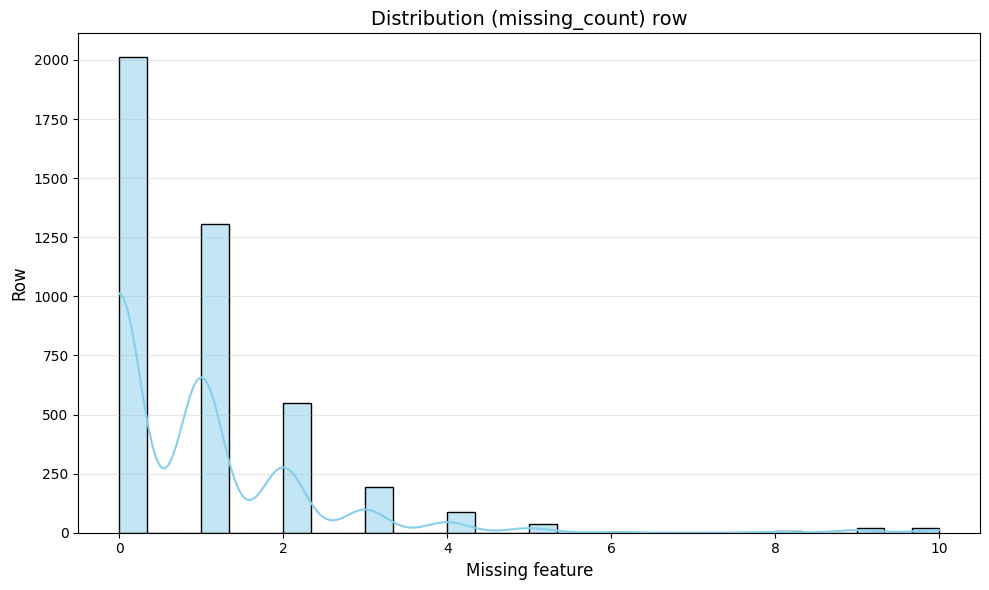

In [118]:
#df_process là df được xử lí ở bước trước đó
df_process = df_new.copy()
df_process["missing_count"] = df_process.isnull().sum(axis=1)

# Vẽ phân bố của số lượng giá trị thiếu trên mỗi hàng
plt.figure(figsize=(10, 6))
sns.histplot(df_process["missing_count"], bins=30, kde=True, color="skyblue")

plt.title("Distribution (missing_count) row", fontsize=14)
plt.xlabel("Missing feature", fontsize=12)
plt.ylabel("Row", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [119]:
# Kiểm tra số lượng record bị missing value nhiều hơn 6 cột - tiến hành xoá 
nums_col = df_new.shape[1]
threshold_cols = 10
num_missing_row_10 = (df_new.isnull().sum(axis=1) > nums_col-threshold_cols).sum()
print(f"Số lượng record có số cột bị missing value nhiều hơn {nums_col-threshold_cols}/{nums_col} cột: {num_missing_row_10}")

df_new=df_new.dropna(thresh=threshold_cols)

Số lượng record có số cột bị missing value nhiều hơn 6/16 cột: 51


In [120]:
year_range = range(2001, 2022)
expected_years = len(year_range)

missing_years = (
    df_new.groupby("country")["year"]
      .nunique()
      .reset_index(name="num_years_having")
)
missing_years = missing_years[missing_years["num_years_having"] < expected_years]

print("Các quốc gia thiếu năm dữ liệu:")
print(missing_years)

Các quốc gia thiếu năm dữ liệu:
         country  num_years_having
159  South Sudan                15


In [121]:
# Loại bỏ quốc gia bị thiếu năm dữ liệu
df_new=df_new[~df_new['country'].isin(missing_years['country'])]
print(f"Số lượng quốc gia còn lại: {len(df_new['country'].unique())}")

Số lượng quốc gia còn lại: 190


In [122]:
# Tạo thêm cột "tỉ lệ mất rừng" 
df_new['ft_deforest_percent'] = np.where(
    # Điều kiện hợp lệ: cả hai không missing và mẫu khác 0
    (~df_new['ft_deforest_area_ha'].isna()) &
    (~df_new['ft_forest_area_ha'].isna()) &
    (df_new['ft_forest_area_ha'] != 0),

    # Giá trị tính toán
    df_new['ft_deforest_area_ha'] / df_new['ft_forest_area_ha']*100,

    # Nếu không thỏa điều kiện → NaN
    np.nan)

In [123]:
feature_cols = df_new.select_dtypes(include=['float64', 'int64']).columns
feature_cols = [col for col in feature_cols if col not in ['year']]
feature_cols

['ft_co2',
 'ft_hdi',
 'ft_industr_on_gdp',
 'ft_deforest_area_ha',
 'ft_forest_area_percent',
 'ft_population',
 'ft_globalclimatephysicalriskindexgcpri',
 'ft_government_expenditure_on_education',
 'ft_area_ha',
 'ft_gdp',
 'ft_renewable_energy',
 'ft_energy_capita',
 'ft_forest_area_ha',
 'ft_deforest_percent']

In [124]:
df_new.describe()

,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_government_expenditure_on_education,ft_area_ha,ft_gdp,ft_renewable_energy,ft_energy_capita,ft_forest_area_ha,ft_deforest_percent
count,4180.000000,4180.000000,4044.000000,3981.000000,3.702000e+03,4159.000000,4.180000e+03,3588.000000,2792.000000,4.180000e+03,4.133000e+03,4038.000000,3686.000000,4.159000e+03,3681.000000
mean,2011.500000,166.803044,0.701187,26.737950,1.239619e+05,33.156789,3.726884e+07,14.956499,14.541856,7.010904e+07,3.588396e+11,32.686503,24807.330416,2.153736e+07,0.502597
std,6.345048,776.949274,0.157945,12.323561,4.702437e+05,24.285723,1.384842e+08,7.445186,4.905071,1.934060e+08,1.546832e+12,29.610549,35721.398516,7.939246e+07,1.110441
min,2001.000000,0.011000,0.272000,2.390762,0.000000e+00,0.000000,9.586000e+03,0.000000,1.704694,2.100000e+03,1.396473e+07,0.000000,0.000000,0.000000e+00,0.000000
25%,2006.000000,2.009750,0.579000,19.036033,4.079887e+02,11.570601,1.925652e+06,10.481747,10.971829,2.633800e+06,5.506942e+09,7.100000,2743.678650,3.714294e+05,0.079297
50%,2011.500000,10.606000,0.723500,24.643609,7.907414e+03,32.166991,7.800056e+06,14.622236,13.963067,1.254555e+07,2.340400e+10,23.400000,10883.031000,2.667916e+06,0.269034
75%,2017.000000,64.100500,0.825000,31.701404,5.641094e+04,51.510766,2.589699e+07,18.499250,17.513477,5.279680e+07,1.626920e+11,54.475000,31832.064000,1.272453e+07,0.626169
max,2022.000000,11447.913000,0.969000,86.669555,6.518851e+06,95.551663,1.425423e+09,68.372508,44.801800,1.709824e+09,2.600690e+13,98.300000,270980.620000,8.153120e+08,48.654509


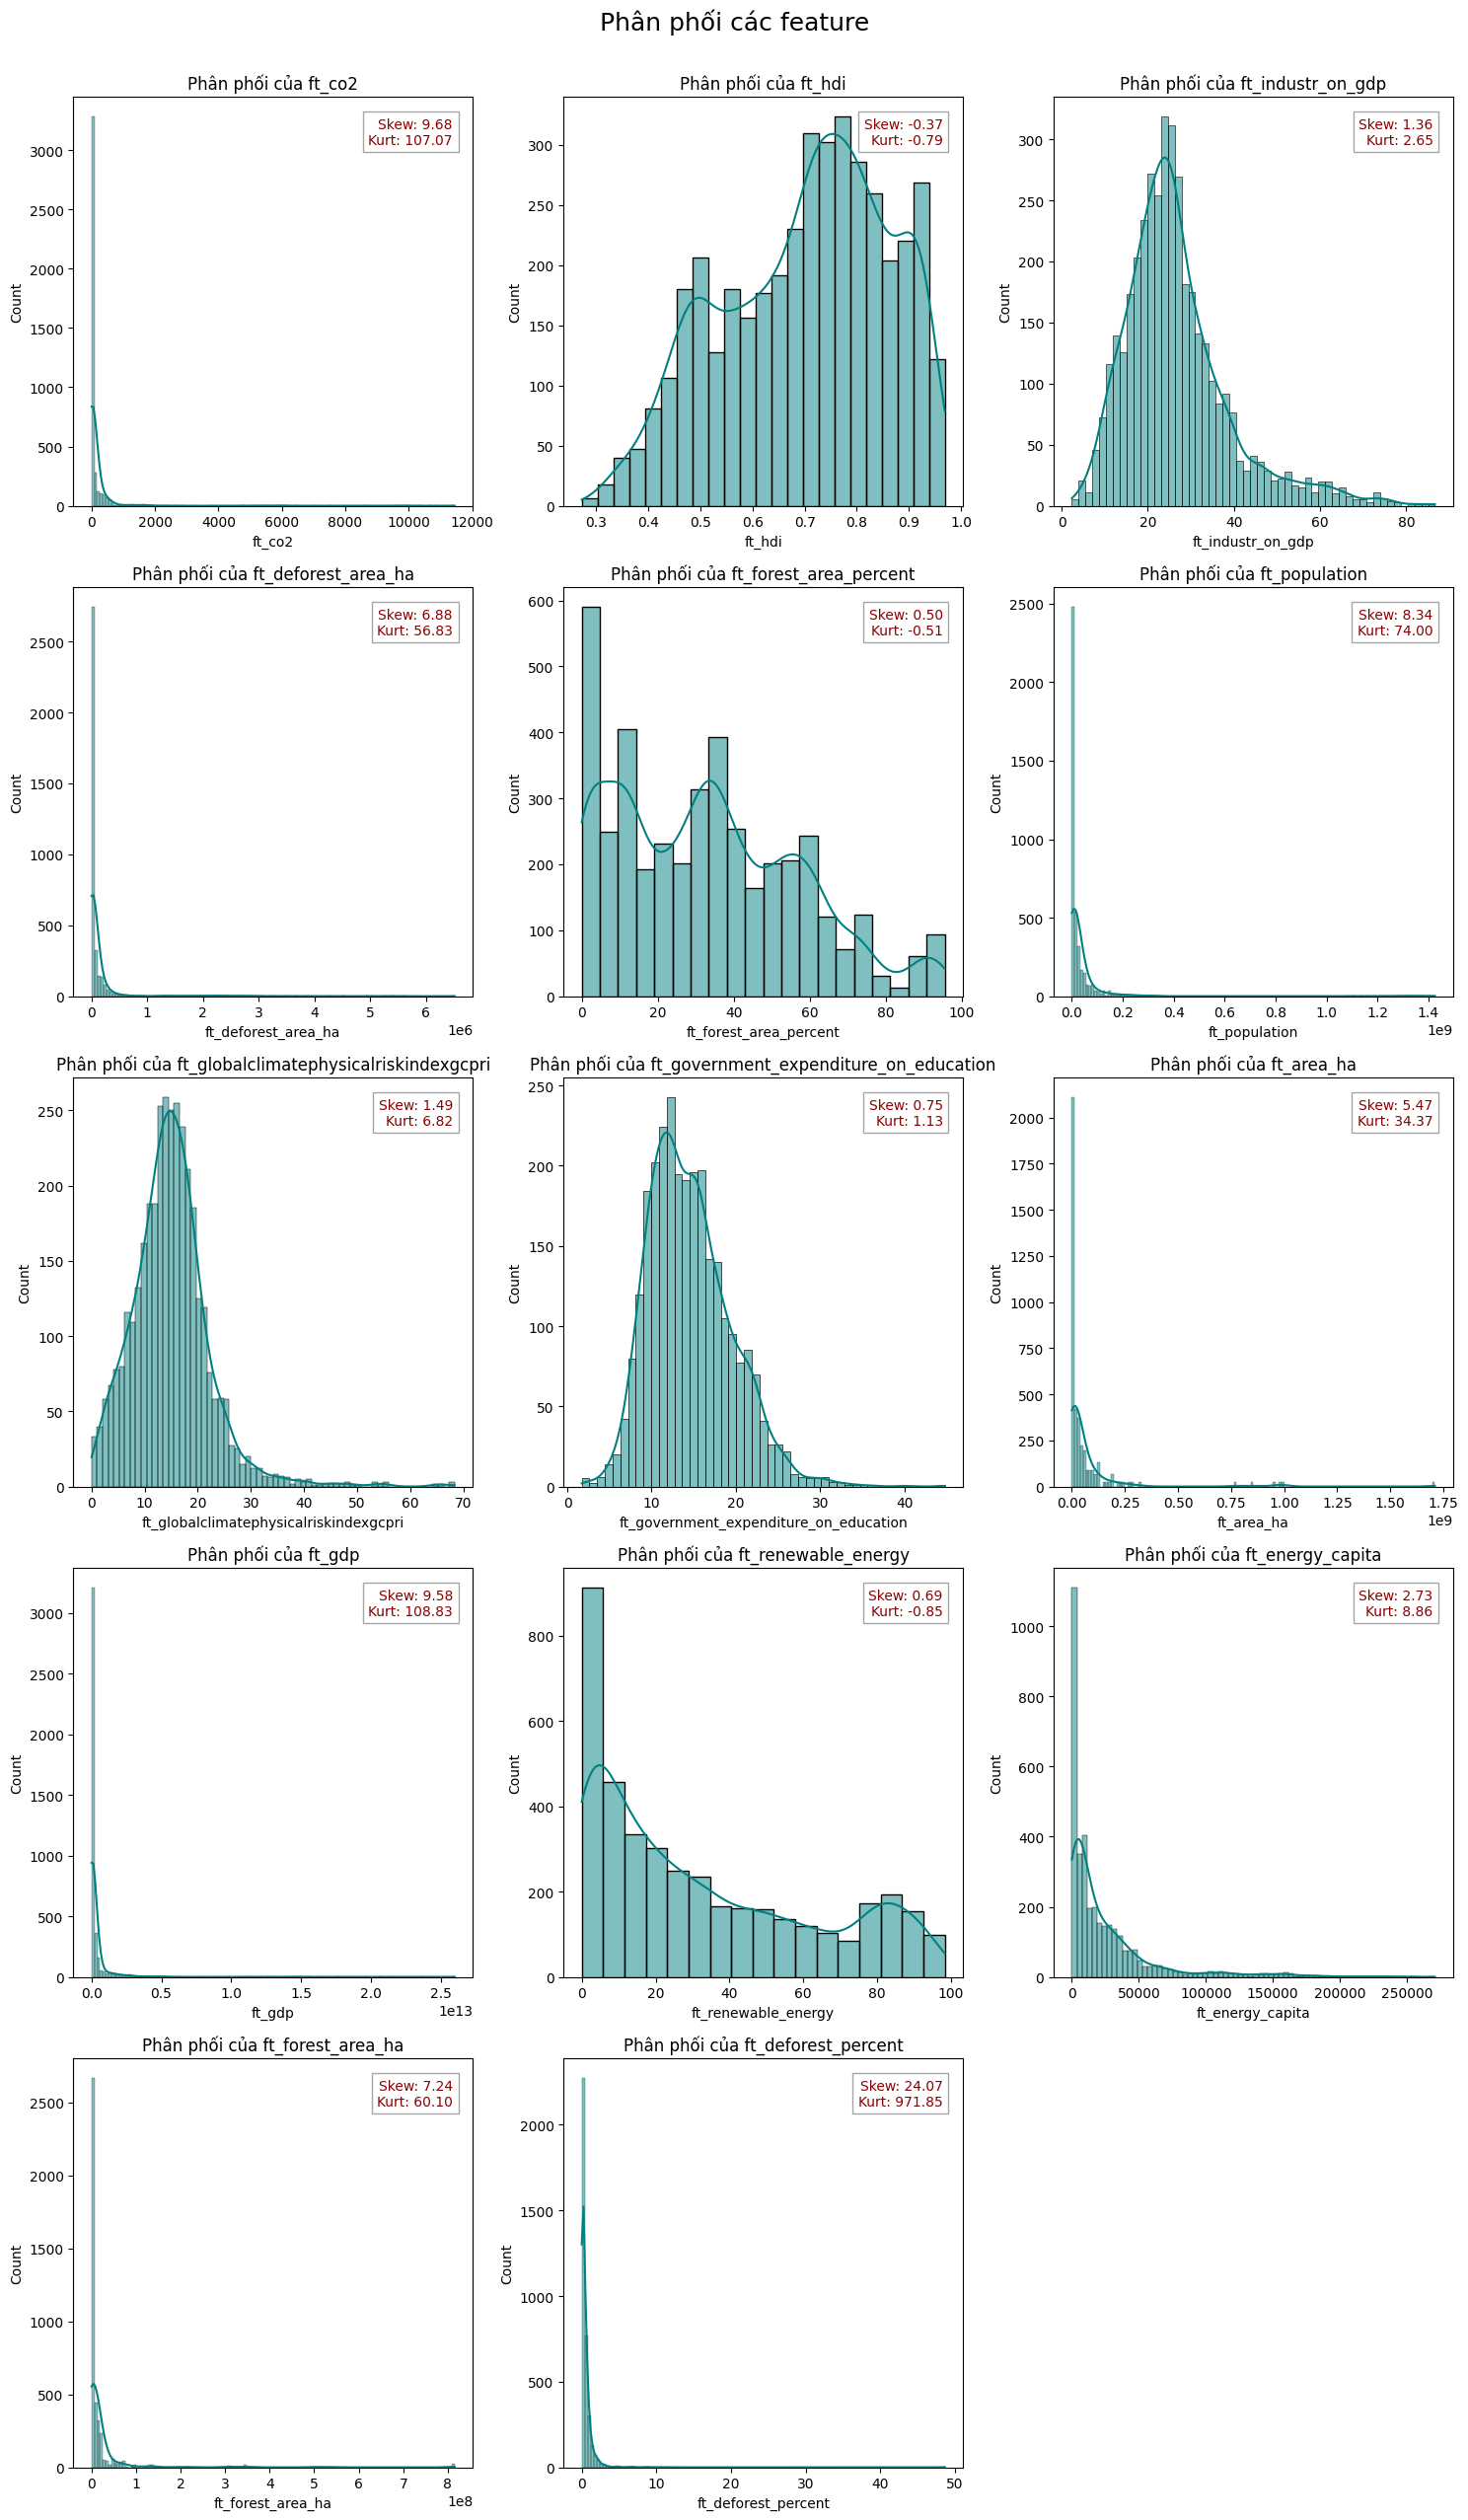

In [125]:
n_cols = 3  # số cột biểu đồ mỗi hàng
n_rows = -(-len(feature_cols) // n_cols)  # làm tròn lên

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.histplot(df_new[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Phân phối của {col}')

    skew_val = df_new[col].skew()
    kurt_val = df_new[col].kurt()
    axes[i].text(
        0.95, 0.95,
        f'Skew: {skew_val:.2f}\nKurt: {kurt_val:.2f}',
        transform=axes[i].transAxes,
        fontsize=10,
        color='darkred',
        ha='right',
        va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )
# Xóa các ô trống (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Phân phối các feature", fontsize=18, y=1.02)
plt.show()

Filling Missing Value

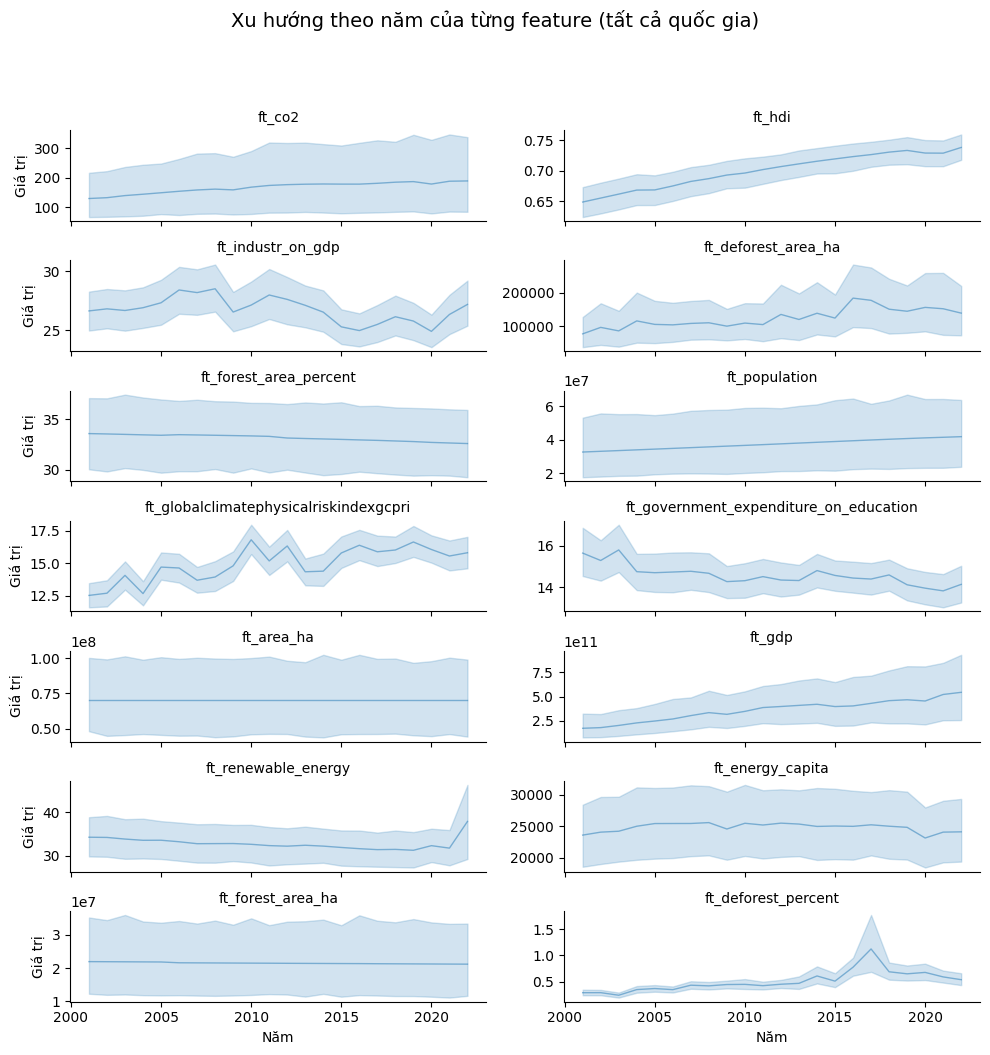

In [126]:
df_melt = df_new.melt(id_vars=['country', 'year'], value_vars=feature_cols,
                      var_name='Feature', value_name='Value')

# Vẽ mỗi feature 1 biểu đồ riêng (theo năm)
g = sns.FacetGrid(df_melt, col='Feature', col_wrap=2, sharex=True, sharey=False, height=4)
g.map_dataframe(sns.lineplot, x='year', y='Value', alpha=0.5, linewidth=1)
g.set_titles("{col_name}")
g.set_axis_labels("Năm", "Giá trị")
g.fig.suptitle("Xu hướng theo năm của từng feature (tất cả quốc gia)", fontsize=14, y=1.05)
g.fig.set_size_inches(10, 10)

plt.tight_layout()
plt.show()

In [127]:
def fill_by_interpolate(df, country_col, year_col, features,
                        method="linear", order=None,
                        limit=None, direction="both"):
    df = df.sort_values([country_col, year_col]).copy()

    # Hàm nội suy riêng cho từng quốc gia
    def interpolate_one_country(group):
        for col in features:
            if col not in group.columns:
                continue
            try:
                if order is not None:
                    group[col] = group[col].interpolate(
                        method=method,
                        order=order,
                        limit=limit,
                        limit_direction=direction
                    )
                else:
                    group[col] = group[col].interpolate(
                        method=method,
                        limit=limit,
                        limit_direction=direction
                    )
            except Exception as e:
                print(f"Lỗi khi nội suy {col} ({method}): {e}")
        return group

    # Cách mới: chỉ group và apply trên cột liên quan
    subset_cols = [country_col, year_col] + features
    filled_subset = (
        df[subset_cols]
        .groupby(country_col, group_keys=False)
        .apply(interpolate_one_country)
        .reset_index(drop=True)
    )

    # Ghép ngược lại với toàn bộ DataFrame gốc
    df_filled = df.drop(columns=features).merge(
        filled_subset, on=[country_col, year_col], how="left"
    )

    return df_filled

In [128]:
features_linear = ['ft_gdp', 'ft_population','ft_hdi','ft_forest_area_percent','ft_energy_capita']
df_linear = fill_by_interpolate(df_new, 'country', 'year', features_linear, method='linear')

/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_10715/535070243.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(interpolate_one_country)


In [129]:
compare_non_null = pd.DataFrame({
    "non_null_in_df_new": df_new[features_linear].notna().sum(),
    "non_null_in_df_linear": df_linear[features_linear].notna().sum()
})

# Tính thêm cột cho thấy sự thay đổi sau khi fill
compare_non_null["increased_by"] = (
    compare_non_null["non_null_in_df_linear"] - compare_non_null["non_null_in_df_new"]
)

compare_non_null

,non_null_in_df_new,non_null_in_df_linear,increased_by
ft_gdp,4133,4158,25
ft_population,4180,4180,0
ft_hdi,4044,4158,114
ft_forest_area_percent,4159,4180,21
ft_energy_capita,3686,3696,10


In [130]:
fill_cols = df_new.select_dtypes(include=['float64', 'int64']).columns
fill_cols = [col for col in fill_cols if col not in ['year','ft_deforest_area_ha','ft_forest_area_ha']]
fill_cols

['ft_co2',
 'ft_hdi',
 'ft_industr_on_gdp',
 'ft_forest_area_percent',
 'ft_population',
 'ft_globalclimatephysicalriskindexgcpri',
 'ft_government_expenditure_on_education',
 'ft_area_ha',
 'ft_gdp',
 'ft_renewable_energy',
 'ft_energy_capita',
 'ft_deforest_percent']

In [131]:
df_linear['ft_energy_capita'] = df_linear['ft_energy_capita'].replace(0, np.nan)

In [132]:
#Sử dụng KNN để fill những missing còn lại
df_filled = df_linear.copy()
imputer = KNNImputer(n_neighbors=3, weights="distance")
df_filled[fill_cols] = imputer.fit_transform(df_filled[fill_cols])

In [133]:
mask_missing_forest = df_filled['ft_forest_area_ha'].isna()
df_filled.loc[mask_missing_forest, 'ft_forest_area_ha'] = (
    df_filled.loc[mask_missing_forest, 'ft_forest_area_percent']*df_filled.loc[mask_missing_forest, 'ft_area_ha']/100
)

In [134]:
mask_missing_deforest = df_filled['ft_deforest_area_ha'].isna()
df_filled.loc[mask_missing_deforest, 'ft_deforest_area_ha'] = (
    df_filled.loc[mask_missing_deforest, 'ft_deforest_percent']*df_filled.loc[mask_missing_deforest, 'ft_forest_area_ha']/100
)

In [135]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 4180 non-null   object 
 1   iso_code                                4180 non-null   object 
 2   year                                    4180 non-null   float64
 3   ft_co2                                  4180 non-null   float64
 4   ft_industr_on_gdp                       4180 non-null   float64
 5   ft_deforest_area_ha                     4180 non-null   float64
 6   ft_globalclimatephysicalriskindexgcpri  4180 non-null   float64
 7   ft_government_expenditure_on_education  4180 non-null   float64
 8   ft_area_ha                              4180 non-null   float64
 9   ft_renewable_energy                     4180 non-null   float64
 10  ft_forest_area_ha                       4180 non-null   floa

In [136]:
#Thêm cột renewable_energy,
df_filled['ft_co2_capita_tCo2'] = (df_filled['ft_co2']*1000)/ df_filled['ft_population'] # Nhân 1000 để đổi MtCO2 sang tCO2
df_filled['ft_energy'] = (df_filled['ft_energy_capita']*df_filled['ft_population'])/1000 #Chia 1000 để đổi từ kWh sang MWh
df_filled['ft_renewable'] = df_filled['ft_renewable_energy']/100*df_filled['ft_energy'] #Tỉ lệ/100*Tổng năng lượng

In [137]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 4180 non-null   object 
 1   iso_code                                4180 non-null   object 
 2   year                                    4180 non-null   float64
 3   ft_co2                                  4180 non-null   float64
 4   ft_industr_on_gdp                       4180 non-null   float64
 5   ft_deforest_area_ha                     4180 non-null   float64
 6   ft_globalclimatephysicalriskindexgcpri  4180 non-null   float64
 7   ft_government_expenditure_on_education  4180 non-null   float64
 8   ft_area_ha                              4180 non-null   float64
 9   ft_renewable_energy                     4180 non-null   float64
 10  ft_forest_area_ha                       4180 non-null   floa

In [138]:
df_filled.describe()

,year,ft_co2,ft_industr_on_gdp,ft_deforest_area_ha,ft_globalclimatephysicalriskindexgcpri,ft_government_expenditure_on_education,ft_area_ha,ft_renewable_energy,ft_forest_area_ha,ft_deforest_percent,ft_gdp,ft_population,ft_hdi,ft_forest_area_percent,ft_energy_capita,ft_co2_capita_tCo2,ft_energy,ft_renewable
count,4180.000000,4180.000000,4180.000000,4.180000e+03,4180.000000,4180.000000,4.180000e+03,4180.000000,4.180000e+03,4180.000000,4.180000e+03,4.180000e+03,4180.000000,4180.000000,4180.000000,4180.000000,4.180000e+03,4.180000e+03
mean,2011.500000,166.803044,26.469290,1.099042e+05,14.459534,15.464006,7.010904e+07,32.138863,2.148498e+07,0.469802,3.558404e+11,3.726884e+07,0.696553,33.120130,24531.560986,0.004668,7.748254e+08,1.193415e+08
std,6.345048,776.949274,12.249879,4.442639e+05,7.226110,4.842100,1.934060e+08,29.362191,7.919873e+07,1.050578,1.538482e+12,1.384842e+08,0.159429,24.264904,34543.041529,0.006343,3.093744e+09,4.435029e+08
min,2001.000000,0.011000,2.390762,0.000000e+00,0.000000,1.704694,2.100000e+03,0.000000,0.000000e+00,0.000000,1.396473e+07,9.586000e+03,0.272000,0.000000,101.881256,0.000022,2.084629e+04,0.000000e+00
25%,2006.000000,2.009750,18.648042,1.229461e+02,9.989139,11.959091,2.633800e+06,7.375000,3.732800e+05,0.085321,5.514741e+09,1.925652e+06,0.572000,11.531969,3044.481649,0.000706,8.969520e+06,1.632073e+06
50%,2011.500000,10.606000,24.484541,4.367039e+03,14.170755,14.696211,1.254555e+07,22.200000,2.668153e+06,0.237019,2.312188e+10,7.800056e+06,0.719000,32.019730,11437.557500,0.002462,5.218452e+07,1.140229e+07
75%,2017.000000,64.100500,31.401504,4.450300e+04,18.066607,19.091530,5.279680e+07,53.000000,1.284764e+07,0.573133,1.618125e+11,2.589699e+07,0.822000,51.500463,31605.523750,0.006350,3.802702e+08,4.729327e+07
max,2022.000000,11447.913000,86.669555,6.518851e+06,68.372508,44.801800,1.709824e+09,98.300000,8.153120e+08,48.654509,2.600690e+13,1.425423e+09,0.969000,95.551663,270980.620000,0.067584,4.411028e+10,6.598998e+09


In [139]:
#Đổi tên cột
df_filled = df_filled.rename(columns={
    'country': "Country",
    'iso_code': "ISO_Code",
    'year': "Year",
    'ft_co2': "Co2_MtCO2",
    'ft_industr_on_gdp': 'Industry_on_GDP',
    'ft_gdp': 'GDP',
    'ft_population': 'Population',
    'ft_hdi': 'HDI',
    'ft_deforest_area_ha': "Deforest_Area_ha",
    'ft_globalclimatephysicalriskindexgcpri': "Global_Climate_Risk_Index",
    'ft_government_expenditure_on_education': "Government_Expenditure_on_Education",
    'ft_forest_area_ha': "Forest_Area_ha",
    'ft_forest_area_percent': "Forest_Area_Percent",
    'ft_area_ha': "Area_ha",
    'ft_deforest_percent': "Deforest_Percent",
    'ft_renewable_energy': "Renewable_Energy_Percent",
    'ft_energy_capita': "Energy_Capita_kWh",
    'ft_energy': "Energy_MWh",
    'ft_co2_capita_tCo2': "Co2_Capita_tCO2",
    'ft_renewable': "Renewable_Energy_MWh",

})

In [140]:
# Đổi thứ tự cột
new_order = ['Country', 'ISO_Code', 'Year', 'Co2_MtCO2','Co2_Capita_tCO2', 'GDP', 'Population','Industry_on_GDP','HDI','Government_Expenditure_on_Education', 'Global_Climate_Risk_Index',
       'Area_ha','Forest_Area_ha','Forest_Area_Percent','Deforest_Area_ha', 'Deforest_Percent',
        'Energy_Capita_kWh','Energy_MWh', 'Renewable_Energy_MWh','Renewable_Energy_Percent']

df_filled = df_filled[new_order]

In [141]:
df_filled

,Country,ISO_Code,Year,Co2_MtCO2,Co2_Capita_tCO2,GDP,Population,Industry_on_GDP,HDI,Government_Expenditure_on_Education,Global_Climate_Risk_Index,Area_ha,Forest_Area_ha,Forest_Area_Percent,Deforest_Area_ha,Deforest_Percent,Energy_Capita_kWh,Energy_MWh,Renewable_Energy_MWh,Renewable_Energy_Percent
0,Afghanistan,AFG,2001.0,1.069,0.000053,2.813572e+09,20284307.0,39.823426,0.355,18.405412,20.008285,65286400.0,1208440.0,1.852782,88.092712,0.007290,179.89190,3.648983e+06,1.663936e+06,45.600000
1,Afghanistan,AFG,2002.0,1.341,0.000063,3.825701e+09,21378117.0,23.810127,0.383,20.537858,17.595130,65286400.0,1208440.0,1.852782,178.947855,0.014808,155.69543,3.328475e+06,1.258164e+06,37.800000
2,Afghanistan,AFG,2003.0,1.560,0.000069,4.520947e+09,22733049.0,22.710864,0.392,17.413352,16.271540,65286400.0,1208440.0,1.852782,244.336255,0.020219,174.55792,3.968234e+06,1.456342e+06,36.700000
3,Afghanistan,AFG,2004.0,1.237,0.000053,5.224897e+09,23560654.0,26.226790,0.408,21.735324,18.795908,65286400.0,1208440.0,1.852782,201.322404,0.016660,157.75752,3.716870e+06,1.642857e+06,44.200000
4,Afghanistan,AFG,2005.0,1.890,0.000077,6.203257e+09,24404567.0,26.812099,0.417,13.073585,12.682471,65286400.0,1208440.0,1.852782,236.021558,0.019531,205.46812,5.014361e+06,1.699868e+06,33.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,Zimbabwe,ZWE,2018.0,11.205,0.000745,3.415606e+10,15034452.0,31.037911,0.586,19.158785,3.969643,39075700.0,17536720.0,45.332093,6541.812114,0.037304,2897.93870,4.356892e+07,3.472443e+07,79.700000
4176,Zimbabwe,ZWE,2019.0,10.263,0.000672,2.571566e+10,15271368.0,32.025943,0.584,10.463589,5.673413,39075700.0,17490650.0,45.213002,11514.478630,0.065832,2603.88100,3.976482e+07,3.220951e+07,81.000000
4177,Zimbabwe,ZWE,2020.0,8.495,0.000547,2.686856e+10,15526888.0,32.767518,0.582,15.666611,2.340203,39075700.0,17444580.0,45.093912,6200.712494,0.035545,2163.06840,3.358572e+07,2.824559e+07,84.100000
4178,Zimbabwe,ZWE,2021.0,10.204,0.000646,2.724051e+10,15797210.0,28.805586,0.581,22.467202,7.120811,39075700.0,17398510.0,44.974822,9012.071679,0.051798,2382.43430,3.763581e+07,3.101191e+07,82.400000


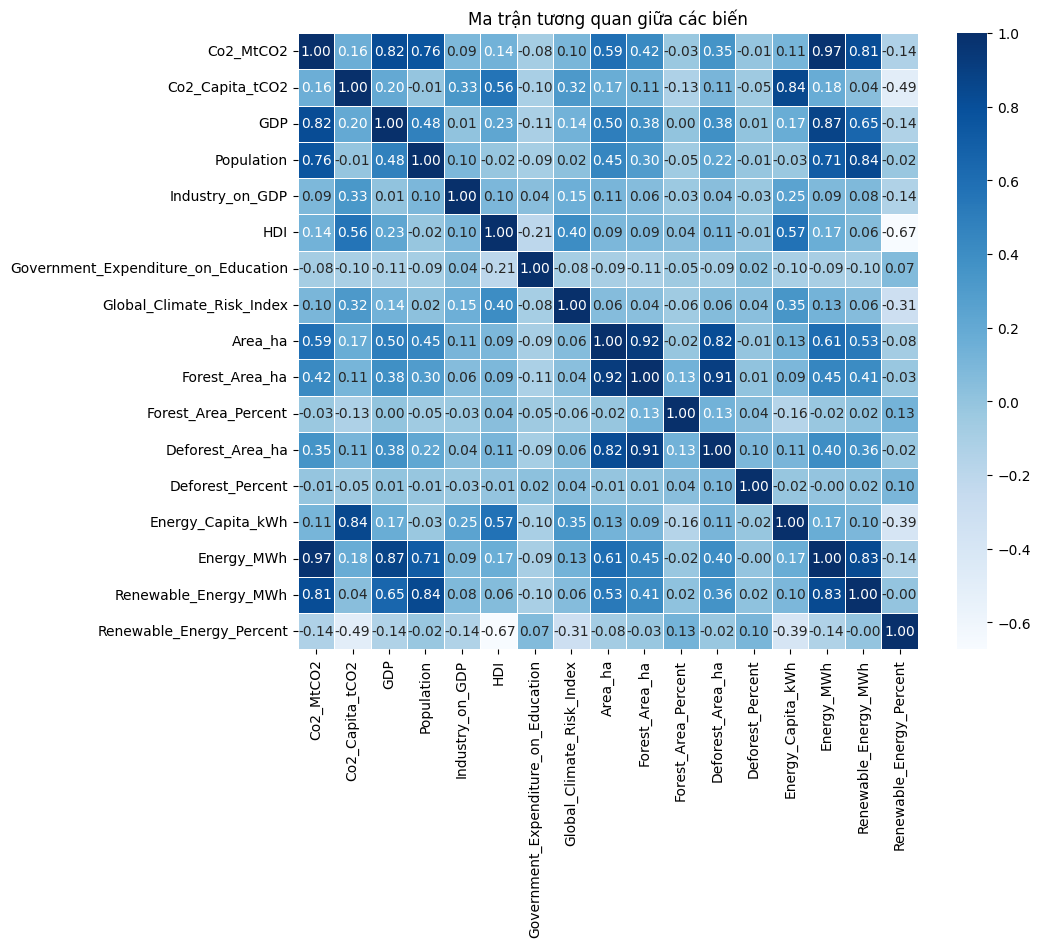

In [142]:
features = df_filled.select_dtypes(include=['float64', 'int64']).columns
features = [col for col in features if col not in ['Year']]
cols = df_new.select_dtypes(include=['float64', 'int64']).columns
cols = [col for col in fill_cols if col not in ['year']]
corr = df_filled[features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,        # hiển thị giá trị hệ số
    fmt=".2f",         # 2 chữ số thập phân
    cmap="Blues",   # màu xanh
    linewidths=0.5
)
plt.title("Ma trận tương quan giữa các biến")
plt.show()

In [143]:
df_filled.to_csv('../Data/filled_data.csv',index=False)